# Placefield analysis

# Example plots

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import subjects
from neuropy import plotting
from neuropy.utils import signal_process
from neuropy.analyses import Pf1D
from neuropy.analyses import Decode1d

sessions = subjects.sd.ratUday4

In [3]:
for sub, sess in enumerate(sessions):
    maze = sess.paradigm["maze"].flatten()
    post = sess.paradigm["post"].flatten()
    neurons = sess.neurons.get_neuron_type(neuron_type="pyr")
    pos = sess.lin_maze
    # pos.t_start = pos.t_start +0.5
    # run = sess.run['backward']
    pf1d = Pf1D(
        neurons=neurons,
        position=pos,
        speed_thresh=4,
        sigma=4,
        grid_bin=2,
        # epochs=run,
        frate_thresh=1,
    )
    pf_neurons = neurons.get_by_id(pf1d.neuron_ids)

<AxesSubplot:xlabel='Position'>

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
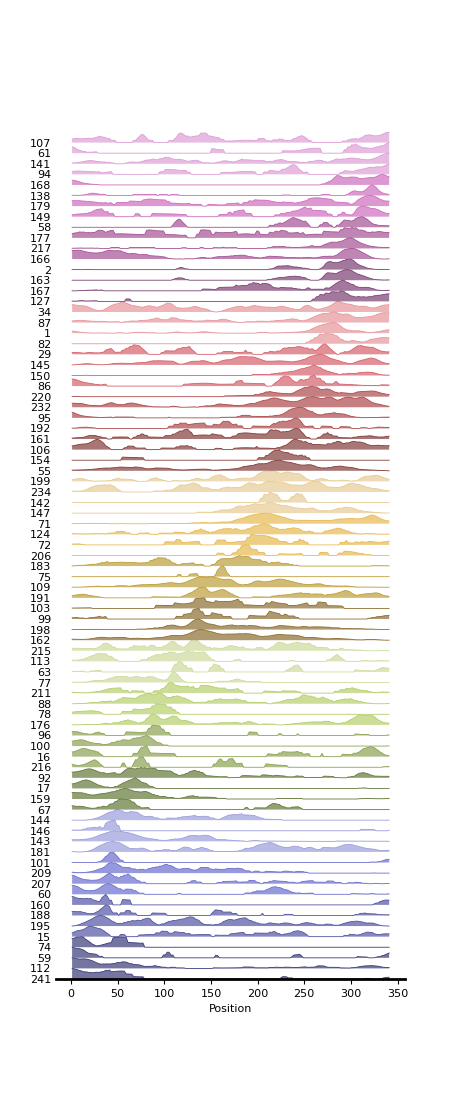

In [4]:
%matplotlib widget
from neuropy.plotting import plot_ratemap

plot_ratemap(pf1d,normalize_tuning_curve=True)

# Test placefields

In [ ]:
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np
from neuropy.core import Position,Neurons
from neuropy.analyses import Pf1D
from neuropy import plotting

t= np.linspace(0,1,240000)
y = np.sin(2*np.pi*12*t)*100

pos = Position(traces=y.reshape(1,-1),t_start=0,sampling_rate=120)

spktrns = []
for i in range(-100,100,30):
    indices = np.where((pos.x>=i)&(pos.x<=i+20))[0]
    indices = np.random.choice(indices,4000)
    spktrns.append(indices/120)
spktrns = np.array(spktrns)

neurons = Neurons(spiketrains=spktrns,t_start=0,t_stop=2000)
pf1d = Pf1D(neurons=neurons,position=pos,speed_thresh=0.1,grid_bin=5,sigma=7)
# _,ax = plt.subplots()

# ax.plot(pos.time,pos.x)
# plotting.plot_raster(neurons,ax=ax)


In [ ]:
%matplotlib widget

# plotting.plot_ratemap(pf1d.ratemap,normalize_tuning_curve=False)
plt.plot(pf1d.occupancy)